In [506]:
#import Pkg; Pkg.add("FileIO")
include("opt.jl")
include("objective.jl")
using Images, FileIO

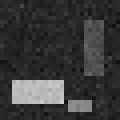

In [507]:
img = load("./im1/1638815998.png")
imgg = Gray.(img);
image_mat = transpose(convert(Array{Float64}, imgg));
imgg

In [508]:
function interior_point_method(f, ∇f, p, ∇p, x, image; ρ=1, γ=2, ϵ=1e-8, α=1, λ=1)
    delta = Inf
    while delta > ϵ
        objective = x -> f(x, g=image, λ=λ, α=α) + p(x, ρ=ρ, g=image)
        grad = x -> ∇f(x, g=image, λ=λ, α=α) .+ ∇p(x, ρ=ρ, g=image)
        x′, fev = minimize(objective, grad, x)
        delta = norm(x′ - x)
        x = x′
        ρ *= γ
        print("ρ = ", ρ, "\n")
    end
    return x
end;

In [509]:
imheight, imwidth = size(image_mat)
α = 2
λ = 2
x = .5*ones(imheight*imwidth + imheight*(imwidth - 1) + imwidth*(imheight - 1));
xip = interior_point_method(gg, ∇gg, p, ∇p, x, image_mat, α=α, λ=λ);
f,h,v = x_to_fhv(xip, image_mat);

ρ = 2
ρ = 4
ρ = 8


In [510]:
# checks
print("f(x_initial) = ", gg(x, g=image_mat, λ=λ,α=α), "\n")
print("f(x_final) = ", gg(xip, g=image_mat, λ=λ,α=α), "\n")
print("max(x_final) = ", maximum(xip), "\n")
print("min(x_final) = ", minimum(xip), "\n")

f(x_initial) = 1771.5587581699353
f(x_final) = 63.81929620995055
max(x_final) = 0.6521368544010757
min(x_final) = 9.99507416835749e-13


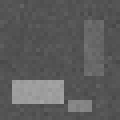

In [511]:
colorview(Gray, f)

In [512]:
r, c = size(f)

(30, 30)

# Now can(should) work with image of any size.

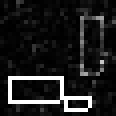

In [514]:
new_h = h
arr_h = [new_h[i] for i = 1:(r*(c-1))]
test_h = reshape(arr_h, (r, c-1))
test_h = transpose(test_h)[r:(r*(c-1))]
test_h = reshape(test_h, (r-1, c-1))
new_v = transpose(v[r:(r*(c-1))])
arr_v = [new_v[i] for i = 1:(r*(c-2))+1]
test_v = reshape(arr_v, (r-1, c-1))
new_mat = transpose(test_v) + test_h
colorview(Gray, new_mat*10000)